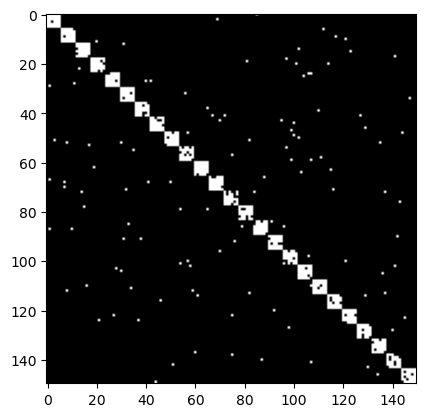

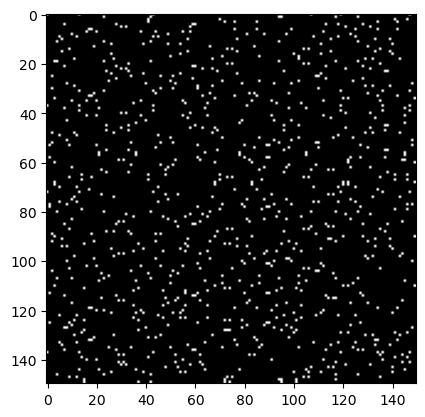

In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from irmlearn import IRM


# Takes 4 parameters, l for nr. of clusters,
# k for nodes in clsuters, p and q for connective
# probabilities inside and outside groups.
def ClusterGraph(l, k, p, q):
    n = l * k
    adjacency = np.zeros((n, n))
    for i in range(n):
        for j in range(n):


            prob = np.random.rand(2)

            if i // k == j // k and prob[0] < p:
                adjacency[i, j] = 1

            elif prob[1] < q:
                adjacency[i, j] = 1

    return adjacency


def block_diag(A, B):
    c1 = np.zeros((A.shape[0], B.shape[1]))

    c2 = np.zeros((B.shape[0], A.shape[1]))

    return np.block([[A, c1],
                     [c2, B]])


l = 25
k = 6

A_adj = ClusterGraph(l, k, 0.9, 0.005)

idxs = np.random.permutation(l * k)
inv_idxs = np.argsort(idxs)

A_random = A_adj[idxs][:, idxs]

Ar = A_adj[np.random.permutation(l*k)]
Ar = Ar[:, np.random.permutation(l*k)]

# A = nx.from_numpy_array(A_random)
# nx.draw(A, node_size=30)

plt.figure()
plt.imshow(A_adj, cmap='gray')

plt.figure()
plt.imshow(Ar, cmap='gray')


In [21]:

alpha = 1.5
a = 0.1
b = 0.1
max_iter = 20

model = IRM(alpha, a, b, max_iter, verbose=True, use_best_iter=True)

model.fit(Ar)

iter=1 -- feature label deleted, n_feature_labels: 37
iter=1 -- sample label deleted, n_sample_labels: 27
iter=1 -- feature label deleted, n_feature_labels: 36
iter=1 -- feature label deleted, n_feature_labels: 35
iter=1 -- sample label deleted, n_sample_labels: 26
iter=1 -- sample label deleted, n_sample_labels: 25
iter=1 -- feature label deleted, n_feature_labels: 34
iter=1 -- feature label deleted, n_feature_labels: 33
iter=1 -- feature label deleted, n_feature_labels: 32
iter=1 -- feature label deleted, n_feature_labels: 31
iter=1 -- sample label deleted, n_sample_labels: 24
iter=1 -- feature label deleted, n_feature_labels: 30
iter=1 -- feature label deleted, n_feature_labels: 29
iter=1 -- feature label deleted, n_feature_labels: 28
iter=2 -- feature label deleted, n_feature_labels: 27
iter=2 -- feature label deleted, n_feature_labels: 26
iter=2 -- feature label deleted, n_feature_labels: 25
iter=2 -- feature label deleted, n_feature_labels: 24
iter=2 -- feature label deleted, n_f

IRM(a=0.1, alpha=1.5, b=0.1, max_iter=20)

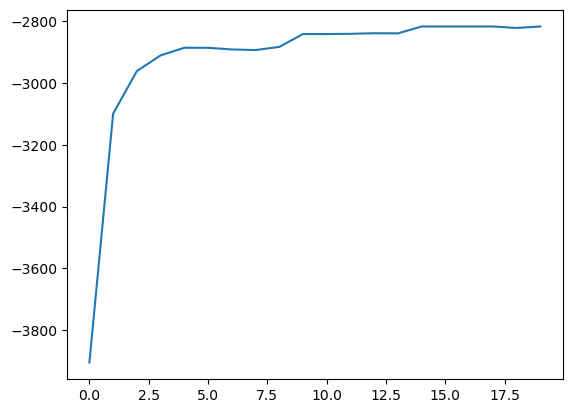

In [22]:
plt.plot(model.history_)

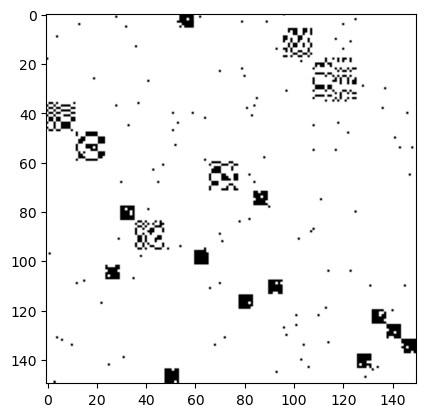

In [23]:
row_index = np.argsort(model.sample_labels_)
col_index = np.argsort(model.feature_labels_)
A_re = Ar[row_index, :][:, col_index]

#inv_idxs = np.argsort(idxs)
#A_re= A_random[inv_idxs,:][:,inv_idxs]

plt.imshow(A_re,cmap='Greys')

In [28]:
model._calc_posterior(Ar)

In [ ]:
model.